## Classification with Fashion MNIST

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[10]]

'T-shirt/top'

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

In [7]:
model.add(tf.keras.layers.Dense(300, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.get_layer("dense_2").get_weights()[0].shape

(100, 10)

In [11]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [12]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7230 - sparse_categorical_accuracy: 0.7642 - val_loss: 0.5160 - val_sparse_categorical_accuracy: 0.8232
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4902 - sparse_categorical_accuracy: 0.8291 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.8536
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4424 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.4094 - val_sparse_categorical_accuracy: 0.8638
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4146 - sparse_categorical_accuracy: 0.8542 - val_loss: 0.4169 - val_sparse_categorical_accuracy: 0.8592
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3932 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.3810 - val_sparse_categorical_accuracy: 0.8664
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3787 - spars

Epoch 46/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1755 - sparse_categorical_accuracy: 0.9371 - val_loss: 0.3049 - val_sparse_categorical_accuracy: 0.8900
Epoch 47/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1725 - sparse_categorical_accuracy: 0.9379 - val_loss: 0.2877 - val_sparse_categorical_accuracy: 0.8956
Epoch 48/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1705 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.2889 - val_sparse_categorical_accuracy: 0.8970
Epoch 49/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1671 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.2894 - val_sparse_categorical_accuracy: 0.8982
Epoch 50/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9409 - val_loss: 0.2935 - val_sparse_categorical_accuracy: 0.8940


In [79]:
history.history

{'loss': [0.7037703990936279,
  0.48887303471565247,
  0.44592031836509705,
  0.4189482033252716,
  0.3981229364871979,
  0.38217321038246155,
  0.3695469796657562,
  0.35719436407089233,
  0.34738826751708984,
  0.33655160665512085,
  0.3275459408760071,
  0.32025983929634094,
  0.3115463852882385,
  0.3052690923213959,
  0.29798707365989685,
  0.29224684834480286,
  0.28692078590393066,
  0.2806830108165741,
  0.274728387594223,
  0.2701435387134552,
  0.26490774750709534,
  0.26016128063201904,
  0.2558918297290802,
  0.2515094578266144,
  0.24629321694374084,
  0.24295061826705933,
  0.2390860915184021,
  0.2345576137304306,
  0.2313501387834549,
  0.2279694676399231,
  0.223734050989151,
  0.21941570937633514,
  0.2156304568052292,
  0.2126302272081375,
  0.20953255891799927,
  0.2059146910905838,
  0.20287668704986572,
  0.19907023012638092,
  0.19573330879211426,
  0.1931246519088745,
  0.191263809800148,
  0.18733568489551544,
  0.18512073159217834,
  0.18110111355781555,
  0.1

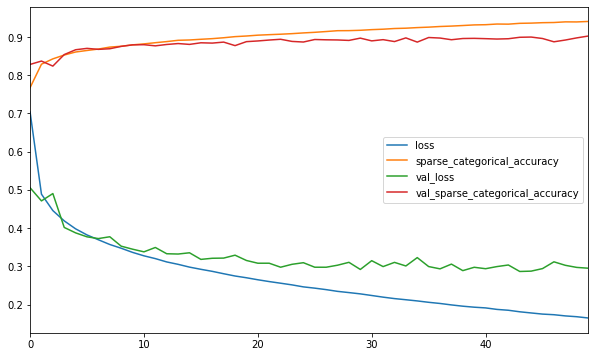

In [80]:
pd.DataFrame(history.history).plot(figsize=(10, 6))

In [81]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.4785 - sparse_categorical_accuracy: 0.8528


[70.4785385131836, 0.8528000116348267]

In [94]:
X_new = X_test[:10]
y_proba = model.predict(X_new)

In [95]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [99]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [100]:
 np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

## Regression with California Houses

In [117]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [118]:
housing = fetch_california_housing()

In [119]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [120]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [121]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [122]:
regModel = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation=tf.keras.activations.relu, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

In [123]:
regModel.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.SGD())

In [124]:
history = regModel.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1536692880978593716170129408.0000 - val_loss: 73919392679194525696.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 5144949157898747904.0000 - val_loss: 31542011232256.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 2195393216512.0000 - val_loss: 13459310.0000
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 936791.1875 - val_loss: 6.8240
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6908 - val_loss: 1.3503
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3073 - val_loss: 1.3524
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3078 - val_loss: 1.3506
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3078 - val_loss: 1.3507
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3075 - val_loss: 1.3515

In [125]:
history.history

{'loss': [1.5366928809785937e+27,
  5.144949157898748e+18,
  2195393216512.0,
  936791.1875,
  1.6907953023910522,
  1.3072798252105713,
  1.3077582120895386,
  1.3077892065048218,
  1.3074510097503662,
  1.3078299760818481,
  1.3073904514312744,
  1.3078782558441162,
  1.3070398569107056,
  1.3077841997146606,
  1.3077843189239502,
  1.307560682296753,
  1.3075127601623535,
  1.3075432777404785,
  1.3075921535491943,
  1.3074589967727661],
 'val_loss': [7.391939267919453e+19,
  31542011232256.0,
  13459310.0,
  6.824003219604492,
  1.35025954246521,
  1.352433681488037,
  1.3505687713623047,
  1.3506873846054077,
  1.3514721393585205,
  1.3502957820892334,
  1.3514593839645386,
  1.3503705263137817,
  1.3513456583023071,
  1.3506214618682861,
  1.3504860401153564,
  1.3504269123077393,
  1.3504377603530884,
  1.3508718013763428,
  1.3502612113952637,
  1.3505198955535889]}

In [126]:
mse_test = regModel.evaluate(X_test, y_test)

162/162 [==============================] - 0s 708us/step - loss: 1.3711


In [129]:
X_new = X_test[:3] # pretend these are new instances1
y_pred = regModel.predict(X_new)
y_pred

array([[2.0783942],
       [2.0783942],
       [2.0783942]], dtype=float32)